In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [14]:
airpollution_2019= pd.read_csv('airpollution_2019.csv',encoding='ANSI')
airpollution_2020= pd.read_csv('airpollution_2020.csv',encoding='ANSI')

In [15]:
airpollution_2019=airpollution_2019.loc[airpollution_2019['측정소명']=='강남구']
airpollution_2020=airpollution_2020.loc[airpollution_2020['측정소명']=='강남구']

In [16]:
airpollution_2019=airpollution_2019.loc[:,['측정일시','미세먼지(㎍/㎥)']]
airpollution_2020=airpollution_2020.loc[:,['측정일시','미세먼지(㎍/㎥)']]

In [17]:
airpollution_2019.columns=['측정일시','미세먼지']
airpollution_2020.columns=['측정일시','미세먼지']

In [18]:
airpollution_2019['측정일시']=airpollution_2019['측정일시'].astype('str')
airpollution_2020['측정일시']=airpollution_2020['측정일시'].astype('str')

In [19]:
airpollution_2019['측정일시']=pd.to_datetime(airpollution_2019['측정일시'])
airpollution_2020['측정일시']=pd.to_datetime(airpollution_2020['측정일시'])

In [20]:
outlier_index = airpollution_2019[airpollution_2019["미세먼지"] >= 80].index
airpollution_2019 = airpollution_2019.drop(index=outlier_index, axis=0)

<AxesSubplot:xlabel='측정일시', ylabel='미세먼지'>

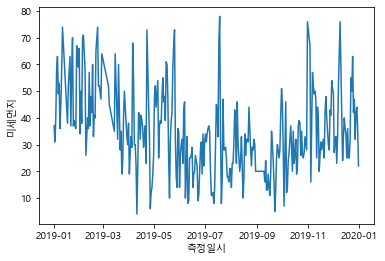

In [21]:
sns.lineplot(x='측정일시',y='미세먼지',data=airpollution_2019)

In [22]:
airpollution_2019.index=airpollution_2019['측정일시']
airpollution_2019.set_index('측정일시',inplace=True)

In [23]:
airpollution_2020.index=airpollution_2020['측정일시']
airpollution_2020.set_index('측정일시',inplace=True)

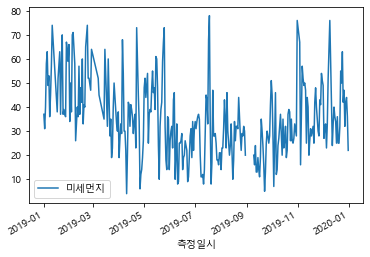

In [24]:
airpollution_2019.plot()
plt.show()

In [486]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [25]:
airpollution_2019=airpollution_2019.dropna()

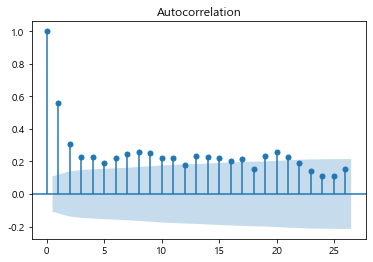

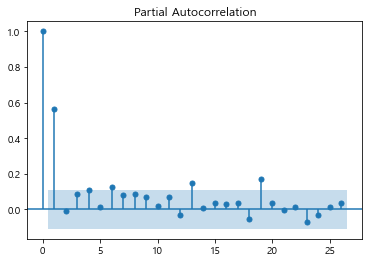

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(airpollution_2019)
plot_pacf(airpollution_2019)
plt.show()

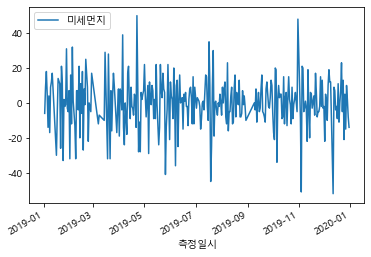

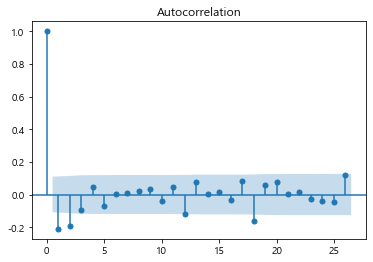

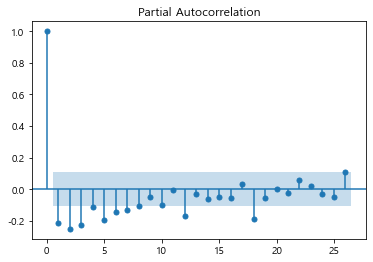

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=airpollution_2019.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [29]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(airpollution_2019,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(airpollution_2019)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2640.099, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2600.533, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2552.181, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2549.476, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2627.470, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2551.722, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2550.464, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2550.131, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2608.675, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2549.784, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2552.108, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2593.730, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2551.568, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2552.913, Time=0.37 sec

Best model:  A

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

In [495]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=0, ma=2)파라미터로 arima모델을 학습
model=ARIMA(airpollution_2019['미세먼지'], order=(0,2,4))
model_fit=model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D2.미세먼지   No. Observations:                  321
Model:                 ARIMA(0, 2, 4)   Log Likelihood               -1268.330
Method:                       css-mle   S.D. of innovations             12.253
Date:                Mon, 18 Oct 2021   AIC                           2548.660
Time:                        17:38:16   BIC                           2571.288
Sample:                             2   HQIC                          2557.695
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0016      0.000      5.513      0.000       0.001       0.002
ma.L1.D2.미세먼지    -1.5109      0.024    -62.159      0.000      -1.558      -1.463
ma.L2.D2.미세먼지     0.1696      0.062     

<AxesSubplot:xlabel='측정일시'>

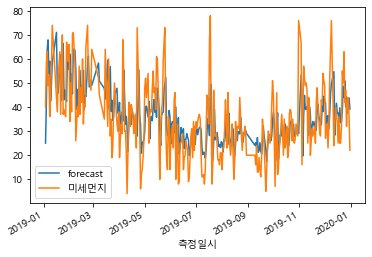

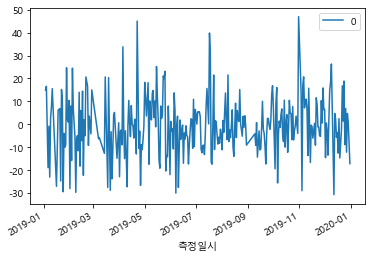

In [496]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [497]:
forecast_data=model_fit.forecast(steps=12)

In [498]:
pred_y=forecast_data[0].tolist()

In [499]:
pred_y

[33.479908375278285,
 40.608722839723164,
 43.1784683152183,
 43.36943552592552,
 43.562038373093955,
 43.756276856723616,
 43.9521509768145,
 44.14966073336661,
 44.34880612637994,
 44.54958715585449,
 44.75200382179026,
 44.956056124187256]

In [500]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [494]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(airpollution_2019.미세먼지.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 2689.303030713934
(0, 0, 1) 2595.5045722898253
(0, 0, 2) 2577.953958266693
(0, 0, 3) 2578.620097567195
(0, 0, 4) 2574.267968561446
(0, 1, 0) 2640.099364522975
(0, 1, 1) 2600.5327064441267
(0, 1, 2) 2552.1800678781424
(0, 1, 3) 2549.475127487083
(0, 1, 4) 2550.8079359302715
(0, 2, 0) 2916.33729614964
(0, 2, 1) 2640.6807314917332
(0, 2, 2) 2604.2031726079504
(0, 2, 3) 2553.154602055618
(0, 2, 4) 2548.6597961749285
(1, 0, 0) 2569.869586557482
(1, 0, 1) 2571.821907127836
(1, 0, 2) 2559.3258894412343
(1, 1, 0) 2627.470414818983
(1, 1, 1) 2551.7218700466456
(1, 1, 2) 2550.4629473481177
(1, 1, 3) 2550.130061286545
(1, 1, 4) 2552.111237988998
(1, 2, 0) 2823.3062162531915
(2, 0, 0) 2571.8355717385543
(2, 0, 1) 2573.6818628319793
(2, 0, 2) 2558.038911786203
(2, 0, 3) 2557.5876812422543
(2, 0, 4) 2559.584730818872
(2, 1, 0) 2608.6747327375188
(2, 1, 1) 2549.783795777374
(2, 1, 2) 2551.539346005364
(2, 1, 3) 2553.422351971014
(2, 1, 4) 2554.0894237472353
(2, 2, 0) 2772.517692717345
(3, 0

In [501]:
airpollution_2020_10=airpollution_2020.head(10)

In [502]:
forecast_data=model_fit.forecast(steps=10) 

pred_y=forecast_data[0].tolist()
test_y=airpollution_2020_10.미세먼지.values 

In [503]:
pred_y

[33.479908375278285,
 40.608722839723164,
 43.1784683152183,
 43.36943552592552,
 43.562038373093955,
 43.756276856723616,
 43.9521509768145,
 44.14966073336661,
 44.34880612637994,
 44.54958715585449]

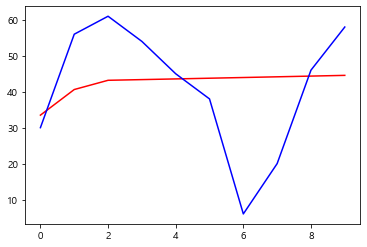

In [504]:
plt.plot(pred_y,color='red')
plt.plot(test_y,color='blue')

In [505]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

17.09395053413779


#  [Facebook Prophet활용하기]

In [342]:
from fbprophet import Prophet

In [400]:
airpollution_2019.columns=['ds','y']
airpollution_2020.columns=['ds','y']

In [401]:
airpollution_2019.head()

,ds,y
0,2019-01-01,37.0
46,2019-01-02,31.0
92,2019-01-03,40.0
138,2019-01-04,58.0
184,2019-01-05,63.0


In [402]:
airpollution_2019=airpollution_2019.reset_index(drop=True)

In [403]:
airpollution_2019['ds']=airpollution_2019['ds'].astype('str')
airpollution_2020['ds']=airpollution_2020['ds'].astype('str')

In [404]:
airpollution_2019['ds']=pd.to_datetime(airpollution_2019['ds'])
airpollution_2020['ds']=pd.to_datetime(airpollution_2020['ds'])

In [405]:
airpollution_2019

,ds,y
0,2019-01-01,37.0
1,2019-01-02,31.0
2,2019-01-03,40.0
3,2019-01-04,58.0
4,2019-01-05,63.0
5,2019-01-06,49.0
6,2019-01-07,53.0
7,2019-01-08,36.0
8,2019-01-09,45.0
9,2019-01-10,57.0


In [406]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(airpollution_2019)

In [407]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
346,2020-01-01,38.986392,19.606601,57.182196
347,2020-01-02,36.925498,17.163789,55.337127
348,2020-01-03,34.618183,15.958455,54.725401
349,2020-01-04,38.030706,19.306487,55.950866
350,2020-01-05,34.269536,15.934422,52.657753


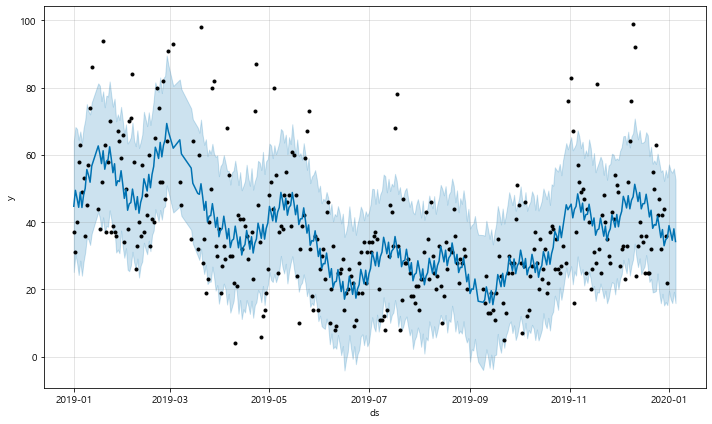

In [408]:
fig1=prophet.plot(forecast_data)

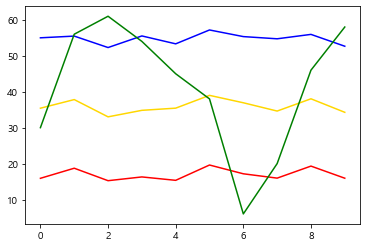

In [409]:


# 마지막 5일의 예측 데이터이다. 
pred_y = forecast_data.yhat.values[-10:]

# 실제 5일 가격 데이터이다.
test_y = airpollution_2020.y.values[0:10]

# 마지막 5일 예측 데이터의 최소값이다.
pred_y_lower = forecast_data.yhat_lower.values[-10:]

# 마지막 5일의 예측 데이터의 최대값이다.
pred_y_upper = forecast_data.yhat_upper.values[-10:]

plt.plot(pred_y, color="gold") # 모델이 예상한 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최저 가격 그래프
plt.plot(pred_y_upper, color = "blue") # 모델이 예상한 최고 가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

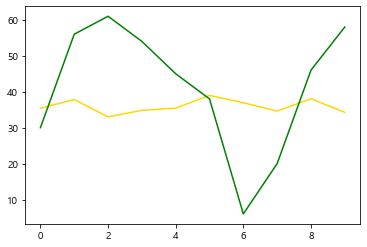

In [410]:
plt.plot(pred_y, color="gold") #모델이 예상한 가격 그래프이다.
plt.plot(test_y, color="green") # 실제 가격 그래프이다.

In [303]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [411]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

18.44138458895538


### 결론: 미세먼지는 날짜 말고 다양한 변수들의 의해 영향을 받아 시계열 분석으로는 예측이 어렵다고 판단됩니다.
#### 시계열 분석은 날짜에 관한 연관성이 매우 높을때 사용해야 한다고 생각했습니다.